In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1: Data Loading

In [3]:
import pandas as pd

# Step 1: Load the Dataset
file_path = '/content/drive/MyDrive/Crime_analysis/crime_dataset_india.csv'
df = pd.read_csv(file_path) # Changed to pd.read_csv as the file is likely a CSV based on its name

# Verify the column names
print(df.columns)

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')


2: Data Visualization

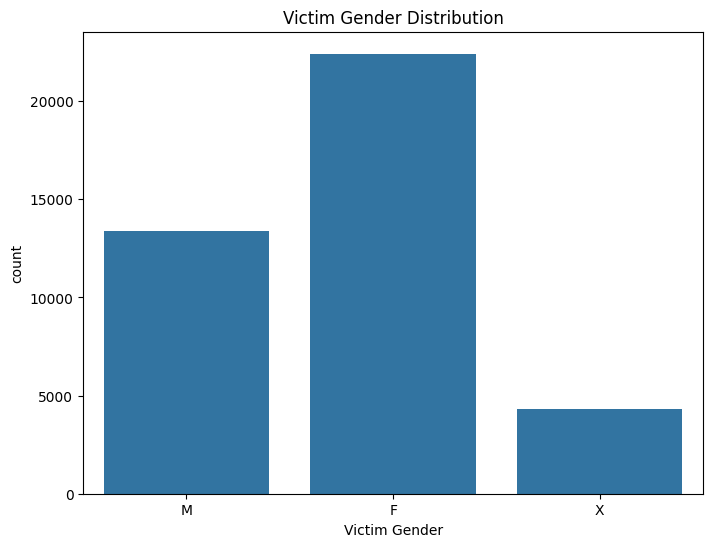

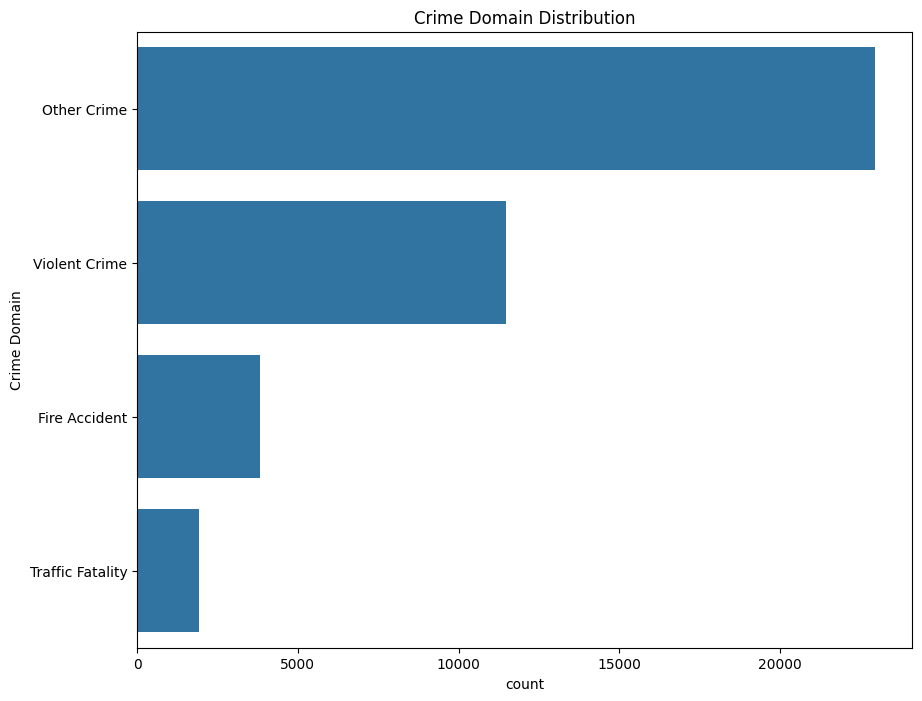

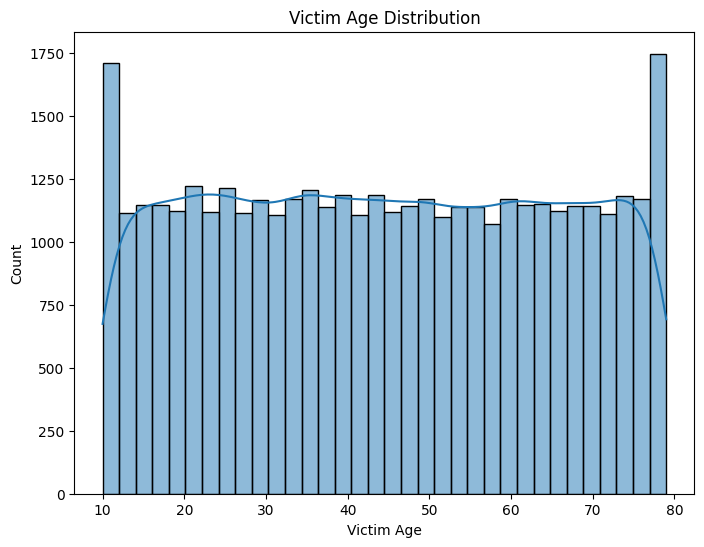

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Victim Gender')
plt.title('Victim Gender Distribution')
plt.show()

# Crime Domain Distribution
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Crime Domain', order=df['Crime Domain'].value_counts().index)
plt.title('Crime Domain Distribution')
plt.show()

# Victim Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Victim Age'], kde=True)
plt.title('Victim Age Distribution')
plt.show()

3: Feature Selection

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LinearRegression

# Convert categorical data to numerical
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Crime Description'] = label_encoder.fit_transform(df['Crime Description'])
df['Victim Gender'] = label_encoder.fit_transform(df['Victim Gender'])
df['Weapon Used'] = label_encoder.fit_transform(df['Weapon Used'])
df['Crime Domain'] = label_encoder.fit_transform(df['Crime Domain'])

# Define features and target variable
X = df[['City', 'Crime Code', 'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain']]
y = df['Police Deployed']

# Feature Selection using SelectKBest
select_k_best = SelectKBest(score_func=chi2, k=3)
X_new_kbest = select_k_best.fit_transform(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]
print(f"Selected features using SelectKBest: {selected_features_kbest}")

# Feature Selection using RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_new_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.get_support()]
print(f"Selected features using RFE: {selected_features_rfe}")

Selected features using SelectKBest: Index(['City', 'Crime Code', 'Victim Age'], dtype='object')
Selected features using RFE: Index(['Victim Gender', 'Weapon Used', 'Crime Domain'], dtype='object')


4: Classification Algorithms

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without Feature Selection
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)

# Random Forest without Feature Selection
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy without Feature Selection: {log_reg_acc}")
print(f"Random Forest Accuracy without Feature Selection: {rf_acc}")

Logistic Regression Accuracy without Feature Selection: 0.05067231075697211
Random Forest Accuracy without Feature Selection: 0.0475597609561753


5: Classification after Feature Selection

In [7]:
# With Feature Selection (Using SelectKBest)
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(X_new_kbest, y, test_size=0.2, random_state=42)

# Logistic Regression with SelectKBest
log_reg.fit(X_train_kbest, y_train_kbest)
y_pred_log_reg_kbest = log_reg.predict(X_test_kbest)
log_reg_acc_kbest = accuracy_score(y_test_kbest, y_pred_log_reg_kbest)

# Random Forest with SelectKBest
rf.fit(X_train_kbest, y_train_kbest)
y_pred_rf_kbest = rf.predict(X_test_kbest)
rf_acc_kbest = accuracy_score(y_test_kbest, y_pred_rf_kbest)

# With Feature Selection (Using RFE)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_new_rfe, y, test_size=0.2, random_state=42)

# Logistic Regression with RFE
log_reg.fit(X_train_rfe, y_train_rfe)
y_pred_log_reg_rfe = log_reg.predict(X_test_rfe)
log_reg_acc_rfe = accuracy_score(y_test_rfe, y_pred_log_reg_rfe)

# Random Forest with RFE
rf.fit(X_train_rfe, y_train_rfe)
y_pred_rf_rfe = rf.predict(X_test_rfe)
rf_acc_rfe = accuracy_score(y_test_rfe, y_pred_rf_rfe)

print(f"Logistic Regression Accuracy with SelectKBest: {log_reg_acc_kbest}")
print(f"Random Forest Accuracy with SelectKBest: {rf_acc_kbest}")
print(f"Logistic Regression Accuracy with RFE: {log_reg_acc_rfe}")
print(f"Random Forest Accuracy with RFE: {rf_acc_rfe}")

Logistic Regression Accuracy with SelectKBest: 0.047933266932270915
Random Forest Accuracy with SelectKBest: 0.05079681274900399
Logistic Regression Accuracy with RFE: 0.049925298804780874
Random Forest Accuracy with RFE: 0.05627490039840637


6.Performance Comparison

In [8]:
# Performance Comparison
print("Performance Comparison:")
print(f"Logistic Regression: Before Feature Selection: {log_reg_acc}, After SelectKBest: {log_reg_acc_kbest}, After RFE: {log_reg_acc_rfe}")
print(f"Random Forest: Before Feature Selection: {rf_acc}, After SelectKBest: {rf_acc_kbest}, After RFE: {rf_acc_rfe}")

Performance Comparison:
Logistic Regression: Before Feature Selection: 0.05067231075697211, After SelectKBest: 0.047933266932270915, After RFE: 0.049925298804780874
Random Forest: Before Feature Selection: 0.0475597609561753, After SelectKBest: 0.05079681274900399, After RFE: 0.05627490039840637
